# Decision Trees 

A decision tree is like going to a doctor who asks a series of questions to determine the cause of your symptoms.

**Let's Play 20 Questions** 

**What are some other real life examples(like our doctor) where our society uses a decision tree mentality to come to an answer?** 



## Entropy and Information Gain 
The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how disordered our groups are, and there is a notion of entropy that measures precisely this.

The entropy of the whole dataset is given by:

$\large E = -\Sigma^n_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group, where $n$ is the number of groups (i.e. target values).

Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.

Let's use the math library's log() function to look at this:
[Powerpoint presentation](https://docs.google.com/presentation/d/1kXs3Mi9a3w87J6tzs2sWyxW8kq2eaRQTBgUPKvuf8x8/edit#slide=id.p9)


In [7]:
#if we start with a 50/50 distribution 
from math import log
import numpy as np 
entropy = -0.5 * log(0.5, 2) - 0.5 * log(0.5, 2)
entropy

1.0

In [8]:
#tree will detect a feature that can split into 30/70
entropy = -0.3 * log(0.3, 2) - 0.7 * log(0.7, 2)
entropy

0.8812908992306927

For a given split, the information gain is simply the entropy of the parent group less the entropy of the split.

For a given parent, then, we maximize our model's performance by minimizing the split's entropy.

What we'd like to do then is:

to look at the entropies of all possible splits, and
to choose the split with the lowest entropy.
In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

**Gini Impurity**

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_ip_i^2$, or, equivalently, $\large G = \Sigma_ip_i(1-p_i)$.

where, again, $p_i$ is the probability of belonging to the $i$th group.

Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.

In [9]:
#gini with 30/70 split 
1 - (0.7**2 + 0.3**2)

0.42000000000000004

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/Users/amberyandow/Downloads/diabetes.csv')

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


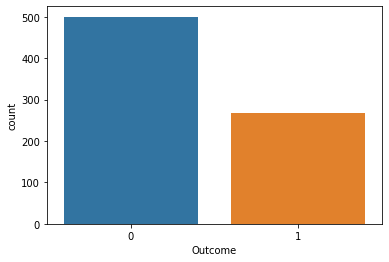

In [13]:
import seaborn as sns
sns.countplot(df['Outcome'],label="Count")

In [14]:
#create numpy arrays for predictors and target variables 
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.6926406926406926
----------------------------------------
Confusion Matrix:
[[115  31]
 [ 40  45]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       146
           1       0.59      0.53      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [ ]:
#brew install graphviz
#pip install -U pydotplus

#For installing graphviz on windows use the url below 
#https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software

### Visualizing the Tree 

**You will likely need to run the cell above before you can use the following code. Export_graphviz converts our classifier into a dot file and pydotplus converts the dot file in a png which can then be displayed into the notebook.** 

/Users/amberyandow/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


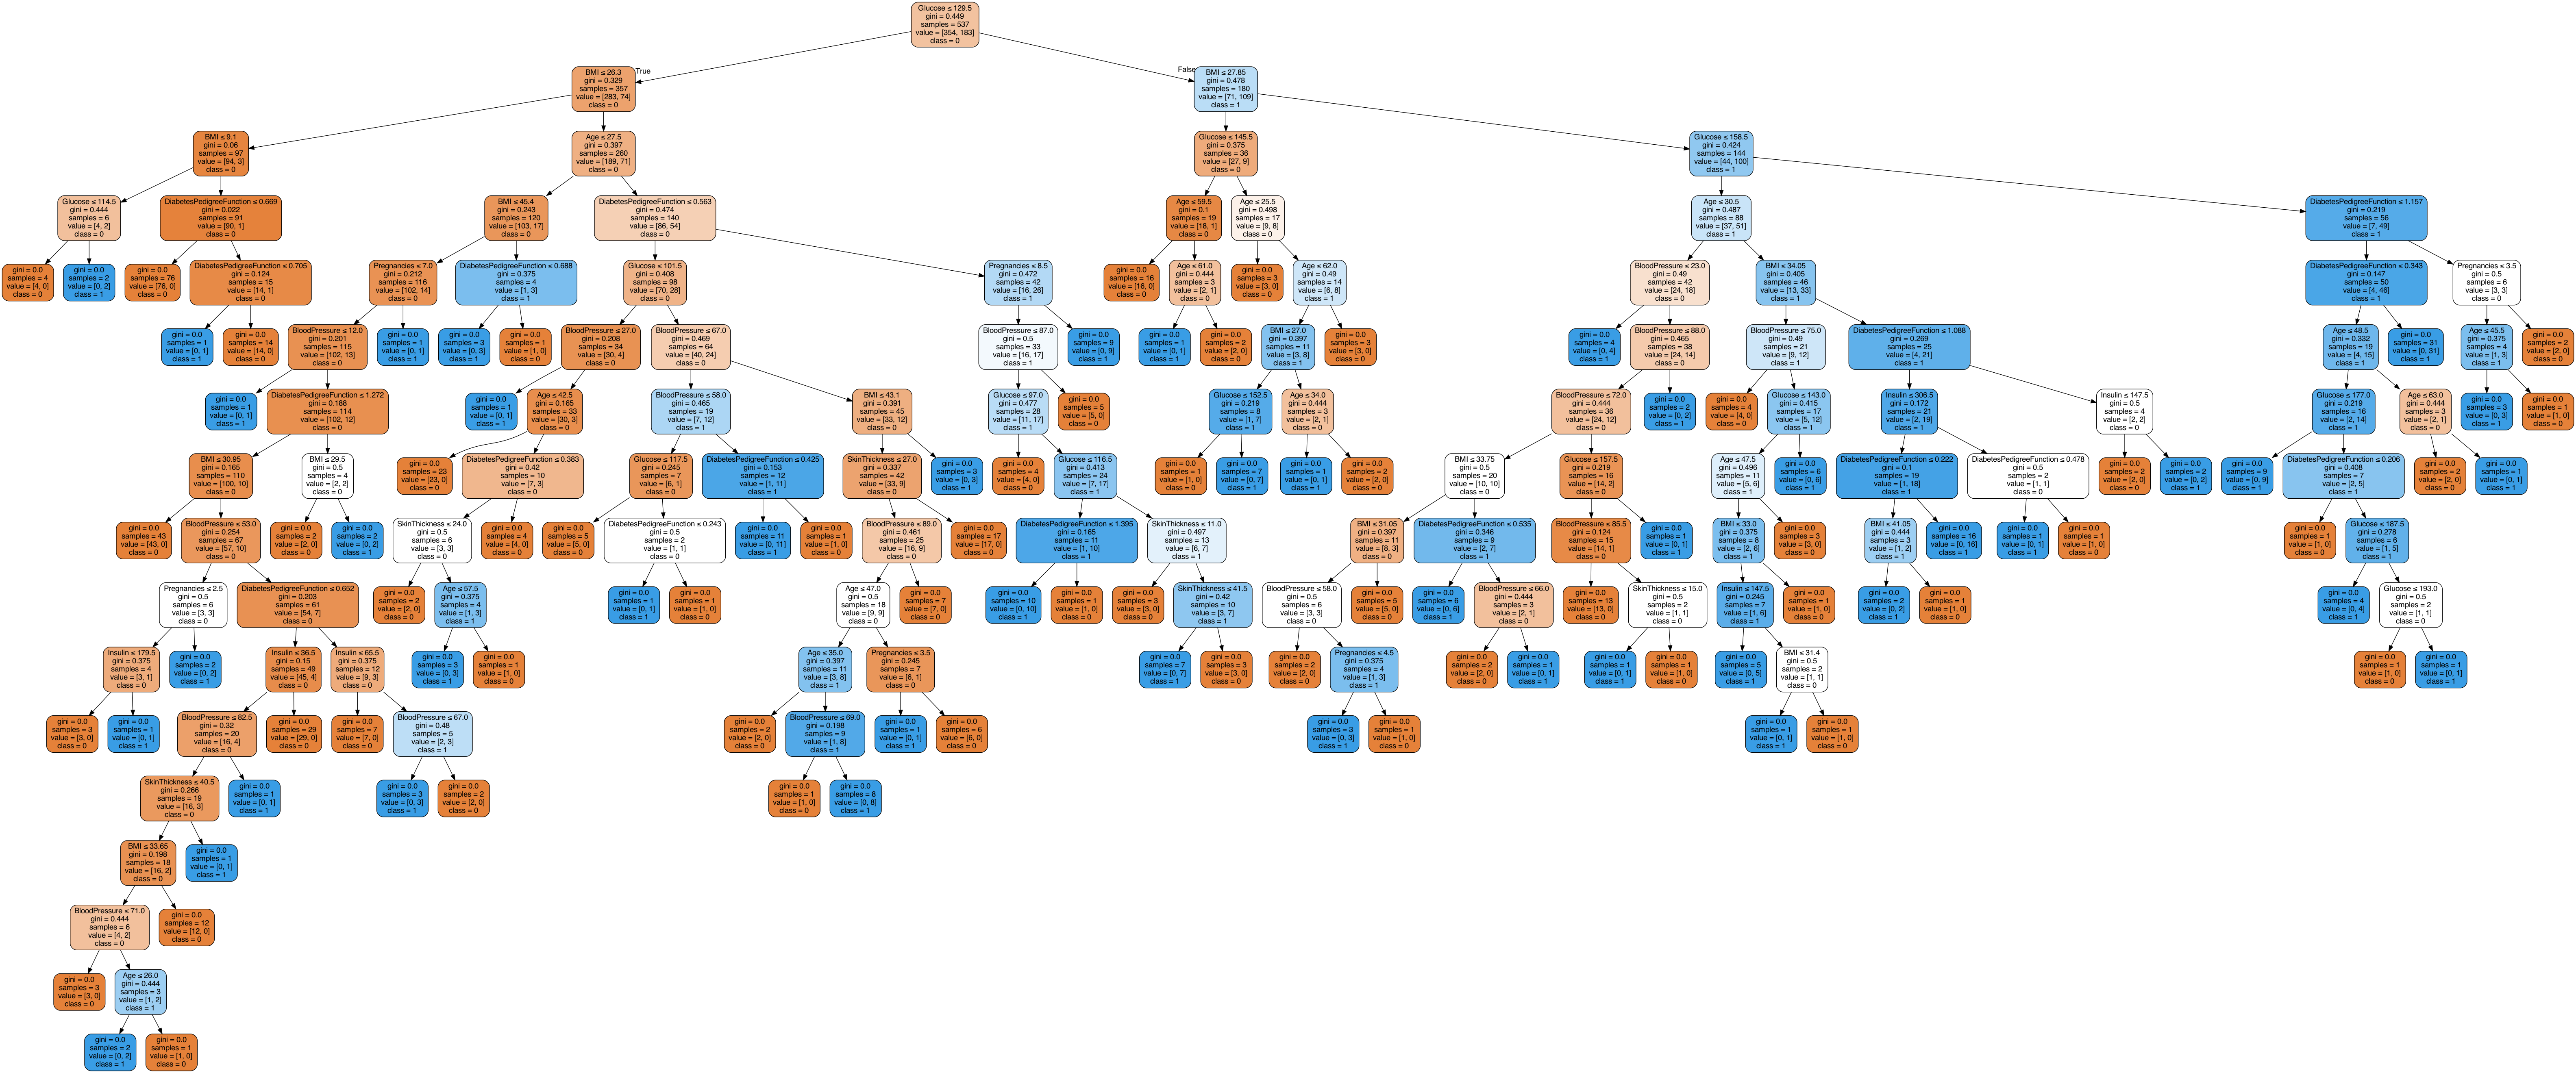

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

**This unpruned tree is not very interpretable. Let's prune these trees and see if we get a better output.** 

## Hyperparameter Tuning 

![](https://miro.medium.com/max/1136/1*3MDxpY_pIMs0yb4dc55KpQ.jpeg)

[Great Medium Article that thoroughly goes over each hyperparameter](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [22]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.7575757575757576
----------------------------------------
Confusion Matrix:
[[127  19]
 [ 37  48]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



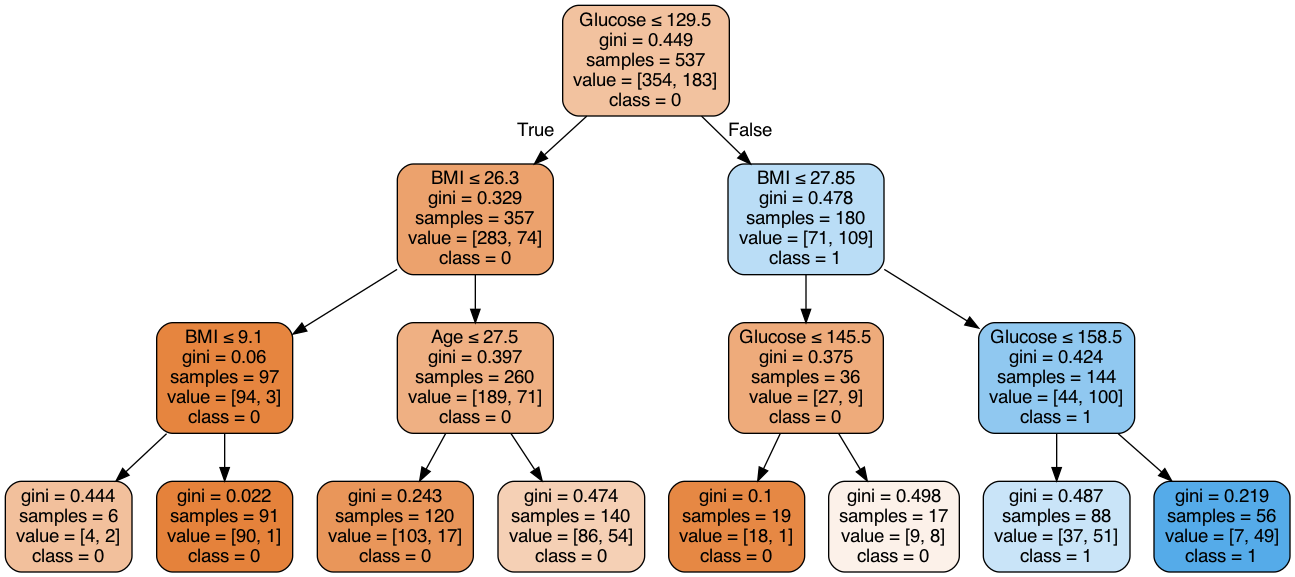

In [23]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Feature Selection 

In [24]:
top_feats = clf.feature_importances_
top_feats


array([0.        , 0.62263778, 0.        , 0.        , 0.        ,
       0.27555314, 0.        , 0.10180908])

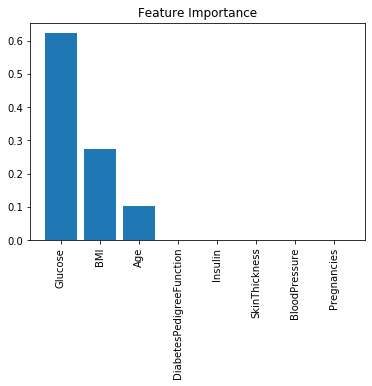

In [25]:
import numpy as np
# creating list of column names
feat_names=list(col_names)

# Sort feature importances in descending order
indices = np.argsort(top_feats)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Pros & Cons 
[Scikit-Learn](https://scikit-learn.org/stable/modules/tree.html#tree)

**Pros**
- East to interpret 
- Easily capture non-linear patterns 
- No need to normalize columns 
- feature engineering/importance 
- Non-parametric/no assumptions 

**Cons**
- Sensitive to noisy data(tends to overfit), can be reduced with tuning 
- Sensitive to variance, can be reduced by bagging/boosting 
- Biased when you have imbalanced data(can be fixed with smote) 